In [1]:
# Import lib
from datetime import datetime
from datetime import timedelta

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [2]:
# Import CSV
incidents = pd.read_csv('./incident_event_log.csv')
incidents_ = incidents.copy()

In [3]:
# Read samples
incidents_.head()

number incident_state  active  reassignment_count  reopen_count  \
0  INC0000045            New    True                   0             0   
1  INC0000045       Resolved    True                   0             0   
2  INC0000045       Resolved    True                   0             0   
3  INC0000045         Closed   False                   0             0   
4  INC0000047            New    True                   0             0   

   sys_mod_count  made_sla    caller_id       opened_by        opened_at  ...  \
0              0      True  Caller 2403    Opened by  8  29/2/2016 01:16  ...   
1              2      True  Caller 2403    Opened by  8  29/2/2016 01:16  ...   
2              3      True  Caller 2403    Opened by  8  29/2/2016 01:16  ...   
3              4      True  Caller 2403    Opened by  8  29/2/2016 01:16  ...   
4              0      True  Caller 2403  Opened by  397  29/2/2016 04:40  ...   

  u_priority_confirmation         notify problem_id rfc vendor caused_by  \
0                   False  Do Not Notify          ?   ?      ?         ?   
1                   False  Do Not Notify          ?   ?      ?         ?   
2                   False  Do Not Notify          ?   ?      ?         ?   
3                   False  Do Not Notify          ?   ?      ?         ?   
4                   False  Do Not Notify          ?   ?      ?         ?   

  closed_code      resolved_by      resolved_at       closed_at  
0      code 5  Resolved by 149  29/2/2016 11:29  5/3/2016 12:00  
1      code 5  Resolved by 149  29/2/2016 11:29  5/3/2016 12:00  
2      code 5  Resolved by 149  29/2/2016 11:29  5/3/2016 12:00  
3      code 5  Resolved by 149  29/2/2016 11:29  5/3/2016 12:00  
4      code 5   Resolved by 81   1/3/2016 09:52  6/3/2016 10:00  

[5 rows x 36 columns]

In [4]:
# Change '?' into None value
incidents_ = incidents_.applymap(lambda x: x if (x != '?') else None )

In [5]:
# Check replacement
incidents_

number incident_state  active  reassignment_count  reopen_count  \
0       INC0000045            New    True                   0             0   
1       INC0000045       Resolved    True                   0             0   
2       INC0000045       Resolved    True                   0             0   
3       INC0000045         Closed   False                   0             0   
4       INC0000047            New    True                   0             0   
...            ...            ...     ...                 ...           ...   
141707  INC0120835         Closed   False                   1             0   
141708  INC0121064         Active    True                   0             0   
141709  INC0121064         Active    True                   1             0   
141710  INC0121064       Resolved    True                   1             0   
141711  INC0121064         Closed   False                   1             0   

        sys_mod_count  made_sla    caller_id       opened_by        opened_at  \
0                   0      True  Caller 2403    Opened by  8  29/2/2016 01:16   
1                   2      True  Caller 2403    Opened by  8  29/2/2016 01:16   
2                   3      True  Caller 2403    Opened by  8  29/2/2016 01:16   
3                   4      True  Caller 2403    Opened by  8  29/2/2016 01:16   
4                   0      True  Caller 2403  Opened by  397  29/2/2016 04:40   
...               ...       ...          ...             ...              ...   
141707              4      True   Caller 116   Opened by  12  16/2/2017 09:09   
141708              0      True   Caller 116   Opened by  12  16/2/2017 14:17   
141709              1      True   Caller 116   Opened by  12  16/2/2017 14:17   
141710              2      True   Caller 116   Opened by  12  16/2/2017 14:17   
141711              3      True   Caller 116   Opened by  12  16/2/2017 14:17   

        ... u_priority_confirmation         notify problem_id   rfc vendor  \
0       ...                   False  Do Not Notify       None  None   None   
1       ...                   False  Do Not Notify       None  None   None   
2       ...                   False  Do Not Notify       None  None   None   
3       ...                   False  Do Not Notify       None  None   None   
4       ...                   False  Do Not Notify       None  None   None   
...     ...                     ...            ...        ...   ...    ...   
141707  ...                    True  Do Not Notify       None  None   None   
141708  ...                   False  Do Not Notify       None  None   None   
141709  ...                   False  Do Not Notify       None  None   None   
141710  ...                    True  Do Not Notify       None  None   None   
141711  ...                    True  Do Not Notify       None  None   None   

       caused_by closed_code      resolved_by      resolved_at  \
0           None      code 5  Resolved by 149  29/2/2016 11:29   
1           None      code 5  Resolved by 149  29/2/2016 11:29   
2           None      code 5  Resolved by 149  29/2/2016 11:29   
3           None      code 5  Resolved by 149  29/2/2016 11:29   
4           None      code 5   Resolved by 81   1/3/2016 09:52   
...          ...         ...              ...              ...   
141707      None      code 9    Resolved by 9  16/2/2017 09:53   
141708      None      code 6    Resolved by 9  16/2/2017 16:38   
141709      None      code 6    Resolved by 9  16/2/2017 16:38   
141710      None      code 6    Resolved by 9  16/2/2017 16:38   
141711      None      code 6    Resolved by 9  16/2/2017 16:38   

              closed_at  
0        5/3/2016 12:00  
1        5/3/2016 12:00  
2        5/3/2016 12:00  
3        5/3/2016 12:00  
4        6/3/2016 10:00  
...                 ...  
141707  16/2/2017 09:53  
141708  16/2/2017 16:38  
141709  16/2/2017 16:38  
141710  16/2/2017 16:38  
141711  16/2/2017 16:38  

[141712 rows x 36 columns]

In [6]:
# Func to check % of na values in columns
def missing_data_table(df):
    percent = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
    return percent

In [7]:
# Check missing data columns
missing_data_table(incidents_)

caused_by                  99.983770
vendor                     99.827820
cmdb_ci                    99.685983
rfc                        99.300694
problem_id                 98.380518
sys_created_at             37.453427
sys_created_by             37.453427
u_symptom                  23.261262
assigned_to                19.402732
assignment_group           10.029496
opened_by                   3.411849
resolved_at                 2.216467
closed_code                 0.503839
resolved_by                 0.159478
subcategory                 0.078328
category                    0.055041
location                    0.053630
caller_id                   0.020464
reassignment_count          0.000000
active                      0.000000
incident_state              0.000000
reopen_count                0.000000
sys_mod_count               0.000000
made_sla                    0.000000
opened_at                   0.000000
closed_at                   0.000000
sys_updated_by              0.000000
s

## Missing data

We saw that columns :
- caused_by
- vendor
- cmdb_ci
- rfc
- problem_id
- sys_created_at
- sys_created_by

Theses columns have more than 25% of null values, then we will drop them.
``` sys_created_at ``` and ``` sys_created_by ``` are similar to ``` opened_at ``` and ``` opened_by ```. We can drop them without losing information.

For prediction purpose, we can also drop ``` number, caller_id, opened_by, assigned_to, assignment_group, resolved_by and resolved_at```.

In [8]:
# Drop useless columns
incidents_.drop('caused_by', axis=1, inplace=True)
incidents_.drop('vendor', axis=1, inplace=True)
incidents_.drop('cmdb_ci', axis=1, inplace=True)
incidents_.drop('rfc', axis=1, inplace=True)
incidents_.drop('problem_id', axis=1, inplace=True)
incidents_.drop('sys_created_at', axis=1, inplace=True)
incidents_.drop('sys_created_by', axis=1, inplace=True)
incidents_.drop('sys_updated_by', axis=1, inplace=True)
incidents_.drop('number', axis=1, inplace=True)
incidents_.drop('caller_id', axis=1, inplace=True)
incidents_.drop('opened_by', axis=1, inplace=True)
incidents_.drop('assigned_to', axis=1, inplace=True)
incidents_.drop('assignment_group', axis=1, inplace=True)
incidents_.drop('resolved_by', axis=1, inplace=True)
incidents_.drop('resolved_at', axis=1, inplace=True)

In [9]:
# Verification
missing_data_table(incidents_)

u_symptom                  23.261262
closed_code                 0.503839
subcategory                 0.078328
category                    0.055041
location                    0.053630
sys_updated_at              0.000000
active                      0.000000
reassignment_count          0.000000
reopen_count                0.000000
sys_mod_count               0.000000
made_sla                    0.000000
opened_at                   0.000000
closed_at                   0.000000
contact_type                0.000000
impact                      0.000000
urgency                     0.000000
priority                    0.000000
knowledge                   0.000000
u_priority_confirmation     0.000000
notify                      0.000000
incident_state              0.000000
dtype: float64

## Delete rows with null values

Since we are predicting ``` closed_at ``` value, the output has to be filled. But this column has 2.2% of missing values. We will drop few rows.

We will delete all rows in columns that have less than 1% of null values.

In [10]:
# Deleting rows
incidents_.drop(
    incidents_[pd.isna(incidents_['closed_at'])].index, 
    inplace=True
)
incidents_.drop(
    incidents_[pd.isna(incidents_['closed_code'])].index, 
    inplace=True
)
incidents_.drop(
    incidents_[pd.isna(incidents_['subcategory'])].index, 
    inplace=True
)
incidents_.drop(
    incidents_[pd.isna(incidents_['category'])].index, 
    inplace=True
)
incidents_.drop(
    incidents_[pd.isna(incidents_['location'])].index, 
    inplace=True
)

In [11]:
# Verification
missing_data_table(incidents_)

u_symptom                  23.163894
closed_at                   0.000000
location                    0.000000
active                      0.000000
reassignment_count          0.000000
reopen_count                0.000000
sys_mod_count               0.000000
made_sla                    0.000000
opened_at                   0.000000
sys_updated_at              0.000000
contact_type                0.000000
category                    0.000000
closed_code                 0.000000
subcategory                 0.000000
impact                      0.000000
urgency                     0.000000
priority                    0.000000
knowledge                   0.000000
u_priority_confirmation     0.000000
notify                      0.000000
incident_state              0.000000
dtype: float64

In [12]:
# Keep only `Resolved` state and drop column
incidents_ = incidents_.where(incidents_.incident_state == 'Resolved')
incidents_.dropna(inplace=True)
incidents_.drop('incident_state', axis=1, inplace=True)
incidents_

active  reassignment_count  reopen_count  sys_mod_count  made_sla  \
1          1.0                 0.0           0.0            2.0       1.0   
2          1.0                 0.0           0.0            3.0       1.0   
11         1.0                 1.0           0.0            7.0       1.0   
18         1.0                 0.0           0.0            5.0       1.0   
22         1.0                 0.0           0.0            2.0       1.0   
...        ...                 ...           ...            ...       ...   
141665     1.0                 0.0           0.0            1.0       1.0   
141668     1.0                 0.0           0.0            5.0       1.0   
141694     1.0                 0.0           0.0            1.0       1.0   
141706     1.0                 1.0           0.0            3.0       1.0   
141710     1.0                 1.0           0.0            2.0       1.0   

              opened_at   sys_updated_at contact_type      location  \
1       29/2/2016 01:16  29/2/2016 08:53        Phone  Location 143   
2       29/2/2016 01:16  29/2/2016 11:29        Phone  Location 143   
11      29/2/2016 04:40   1/3/2016 09:52        Phone  Location 165   
18      29/2/2016 06:10   1/3/2016 02:55        Phone  Location 204   
22      29/2/2016 06:38   2/3/2016 12:06        Phone  Location 204   
...                 ...              ...          ...           ...   
141665  10/2/2017 14:48  10/2/2017 14:52        Phone   Location 51   
141668  10/2/2017 15:55  10/2/2017 16:35        Email  Location 143   
141694  15/2/2017 02:02  17/2/2017 00:47        Email  Location 188   
141706  16/2/2017 09:09  16/2/2017 09:53        Email  Location 204   
141710  16/2/2017 14:17  16/2/2017 16:38        Email  Location 204   

           category      subcategory    u_symptom      impact     urgency  \
1       Category 55  Subcategory 170   Symptom 72  2 - Medium  2 - Medium   
2       Category 55  Subcategory 170   Symptom 72  2 - Medium  2 - Medium   
11      Category 40  Subcategory 215  Symptom 471  2 - Medium  2 - Medium   
18      Category 20  Subcategory 125  Symptom 471  2 - Medium  2 - Medium   
22       Category 9   Subcategory 97  Symptom 450  2 - Medium  2 - Medium   
...             ...              ...          ...         ...         ...   
141665  Category 42  Subcategory 223  Symptom 533  2 - Medium  2 - Medium   
141668   Category 4  Subcategory 282  Symptom 302  2 - Medium  2 - Medium   
141694  Category 52  Subcategory 177  Symptom 494  2 - Medium  2 - Medium   
141706  Category 42  Subcategory 223  Symptom 494  2 - Medium  2 - Medium   
141710  Category 42  Subcategory 223  Symptom 494  2 - Medium  2 - Medium   

            priority  knowledge  u_priority_confirmation         notify  \
1       3 - Moderate        1.0                      0.0  Do Not Notify   
2       3 - Moderate        1.0                      0.0  Do Not Notify   
11      3 - Moderate        1.0                      0.0  Do Not Notify   
18      3 - Moderate        1.0                      0.0  Do Not Notify   
22      3 - Moderate        1.0                      0.0  Do Not Notify   
...              ...        ...                      ...            ...   
141665  3 - Moderate        0.0                      1.0  Do Not Notify   
141668  3 - Moderate        0.0                      1.0  Do Not Notify   
141694  3 - Moderate        0.0                      1.0  Do Not Notify   
141706  3 - Moderate        0.0                      1.0  Do Not Notify   
141710  3 - Moderate        0.0                      1.0  Do Not Notify   

       closed_code        closed_at  
1           code 5   5/3/2016 12:00  
2           code 5   5/3/2016 12:00  
11          code 5   6/3/2016 10:00  
18         code 10   6/3/2016 03:00  
22          code 3   7/3/2016 13:00  
...            ...              ...  
141665      code 7  15/2/2017 15:00  
141668      code 6  15/2/2017 17:00  
141694      code 6  17/2/2017 00:50  
141706      code 9  16/2

In [13]:
# Count rows deleted
deleted = (incidents.shape[0] - incidents_.shape[0] ) 
percent = deleted / incidents.shape[0] * 100
print(f"We've deleted {int(deleted)} ({int(percent)}%) of rows\r")
print(f'{incidents_.shape[0]} rows remaining')

We've deleted 122111 (86%) of rows
19601 rows remaining


In [14]:
# Verification
missing_data_table(incidents_)

closed_at                  0.0
closed_code                0.0
reassignment_count         0.0
reopen_count               0.0
sys_mod_count              0.0
made_sla                   0.0
opened_at                  0.0
sys_updated_at             0.0
contact_type               0.0
location                   0.0
category                   0.0
subcategory                0.0
u_symptom                  0.0
impact                     0.0
urgency                    0.0
priority                   0.0
knowledge                  0.0
u_priority_confirmation    0.0
notify                     0.0
active                     0.0
dtype: float64

In [15]:
# Check incidents columns
incidents_.dtypes

active                     float64
reassignment_count         float64
reopen_count               float64
sys_mod_count              float64
made_sla                   float64
opened_at                   object
sys_updated_at              object
contact_type                object
location                    object
category                    object
subcategory                 object
u_symptom                   object
impact                      object
urgency                     object
priority                    object
knowledge                  float64
u_priority_confirmation    float64
notify                      object
closed_code                 object
closed_at                   object
dtype: object

## Columns values transformation

In [16]:
# Remove string before vals
incidents_.location = incidents_.location.apply(lambda x: x[9:]).astype('int')
incidents_.category = incidents_.category.apply(lambda x: x[9:]).astype('int')
incidents_.subcategory = incidents_.subcategory.apply(lambda x: x[12:]).astype('int')
incidents_.u_symptom = incidents_.u_symptom.apply(lambda x: str(x)[8:]).astype('int')
incidents_.closed_code = incidents_.closed_code.apply(lambda x: x[5:]).astype('int')

incidents_.impact = incidents_.impact.apply(lambda x: str(x)[0]).astype('int')
incidents_.urgency = incidents_.urgency.apply(lambda x: str(x)[0]).astype('int')
incidents_.priority = incidents_.priority.apply(lambda x: str(x)[0]).astype('int')

incidents_

active  reassignment_count  reopen_count  sys_mod_count  made_sla  \
1          1.0                 0.0           0.0            2.0       1.0   
2          1.0                 0.0           0.0            3.0       1.0   
11         1.0                 1.0           0.0            7.0       1.0   
18         1.0                 0.0           0.0            5.0       1.0   
22         1.0                 0.0           0.0            2.0       1.0   
...        ...                 ...           ...            ...       ...   
141665     1.0                 0.0           0.0            1.0       1.0   
141668     1.0                 0.0           0.0            5.0       1.0   
141694     1.0                 0.0           0.0            1.0       1.0   
141706     1.0                 1.0           0.0            3.0       1.0   
141710     1.0                 1.0           0.0            2.0       1.0   

              opened_at   sys_updated_at contact_type  location  category  \
1       29/2/2016 01:16  29/2/2016 08:53        Phone       143        55   
2       29/2/2016 01:16  29/2/2016 11:29        Phone       143        55   
11      29/2/2016 04:40   1/3/2016 09:52        Phone       165        40   
18      29/2/2016 06:10   1/3/2016 02:55        Phone       204        20   
22      29/2/2016 06:38   2/3/2016 12:06        Phone       204         9   
...                 ...              ...          ...       ...       ...   
141665  10/2/2017 14:48  10/2/2017 14:52        Phone        51        42   
141668  10/2/2017 15:55  10/2/2017 16:35        Email       143         4   
141694  15/2/2017 02:02  17/2/2017 00:47        Email       188        52   
141706  16/2/2017 09:09  16/2/2017 09:53        Email       204        42   
141710  16/2/2017 14:17  16/2/2017 16:38        Email       204        42   

        subcategory  u_symptom  impact  urgency  priority  knowledge  \
1               170         72       2        2         3        1.0   
2               170         72       2        2         3        1.0   
11              215        471       2        2         3        1.0   
18              125        471       2        2         3        1.0   
22               97        450       2        2         3        1.0   
...             ...        ...     ...      ...       ...        ...   
141665          223        533       2        2         3        0.0   
141668          282        302       2        2         3        0.0   
141694          177        494       2        2         3        0.0   
141706          223        494       2        2         3        0.0   
141710          223        494       2        2         3        0.0   

        u_priority_confirmation         notify  closed_code        closed_at  
1                           0.0  Do Not Notify            5   5/3/2016 12:00  
2                           0.0  Do Not Notify            5   5/3/2016 12:00  
11                          0.0  Do Not Notify            5   6/3/2016 10:00  
18                          0.0  Do Not Notify           10   6/3/2016 03:00  
22                          0.0  Do Not Notify            3   7/3/2016 13:00  
...                         ...            ...          ...              ...  
141665                      1.0  Do Not Notify            7  15/2/2017 15:00  
141668                      1.0  Do Not Notify            6  15/2/2017 17:00  
141694                      1.0  Do Not Notify            6  17/2/2017 00:50  
141706                      1.0  Do Not Notify            9  16/2/2017 09:53  
141710                      1.0  Do Not Notify            6  16/2/2017 16:38  

[19601 rows x 20 columns]

In [17]:
# Convert to datetime
incidents_.opened_at = incidents_.opened_at.apply(lambda x: datetime.strptime(str(x), '%d/%m/%Y %H:%M'))
incidents_.closed_at = incidents_.closed_at.apply(lambda x: datetime.strptime(str(x), '%d/%m/%Y %H:%M'))

incidents_.sys_updated_at = incidents_.sys_updated_at.apply(lambda x: datetime.strptime(str(x), '%d/%m/%Y %H:%M')).astype('datetime64')

In [18]:
# Process timedelta diff between closed_at and opened_at
incidents_['delta'] = incidents_.closed_at - incidents_.opened_at
incidents_.delta = incidents_.delta / np.timedelta64(1, 's') / 86400
incidents_

active  reassignment_count  reopen_count  sys_mod_count  made_sla  \
1          1.0                 0.0           0.0            2.0       1.0   
2          1.0                 0.0           0.0            3.0       1.0   
11         1.0                 1.0           0.0            7.0       1.0   
18         1.0                 0.0           0.0            5.0       1.0   
22         1.0                 0.0           0.0            2.0       1.0   
...        ...                 ...           ...            ...       ...   
141665     1.0                 0.0           0.0            1.0       1.0   
141668     1.0                 0.0           0.0            5.0       1.0   
141694     1.0                 0.0           0.0            1.0       1.0   
141706     1.0                 1.0           0.0            3.0       1.0   
141710     1.0                 1.0           0.0            2.0       1.0   

                 opened_at      sys_updated_at contact_type  location  \
1      2016-02-29 01:16:00 2016-02-29 08:53:00        Phone       143   
2      2016-02-29 01:16:00 2016-02-29 11:29:00        Phone       143   
11     2016-02-29 04:40:00 2016-03-01 09:52:00        Phone       165   
18     2016-02-29 06:10:00 2016-03-01 02:55:00        Phone       204   
22     2016-02-29 06:38:00 2016-03-02 12:06:00        Phone       204   
...                    ...                 ...          ...       ...   
141665 2017-02-10 14:48:00 2017-02-10 14:52:00        Phone        51   
141668 2017-02-10 15:55:00 2017-02-10 16:35:00        Email       143   
141694 2017-02-15 02:02:00 2017-02-17 00:47:00        Email       188   
141706 2017-02-16 09:09:00 2017-02-16 09:53:00        Email       204   
141710 2017-02-16 14:17:00 2017-02-16 16:38:00        Email       204   

        category  ...  u_symptom  impact  urgency  priority  knowledge  \
1             55  ...         72       2        2         3        1.0   
2             55  ...         72       2        2         3        1.0   
11            40  ...        471       2        2         3        1.0   
18            20  ...        471       2        2         3        1.0   
22             9  ...        450       2        2         3        1.0   
...          ...  ...        ...     ...      ...       ...        ...   
141665        42  ...        533       2        2         3        0.0   
141668         4  ...        302       2        2         3        0.0   
141694        52  ...        494       2        2         3        0.0   
141706        42  ...        494       2        2         3        0.0   
141710        42  ...        494       2        2         3        0.0   

        u_priority_confirmation         notify closed_code  \
1                           0.0  Do Not Notify           5   
2                           0.0  Do Not Notify           5   
11                          0.0  Do Not Notify           5   
18                          0.0  Do Not Notify          10   
22                          0.0  Do Not Notify           3   
...                         ...            ...         ...   
141665                      1.0  Do Not Notify           7   
141668                      1.0  Do Not Notify           6   
141694                      1.0  Do Not Notify           6   
141706                      1.0  Do Not Notify           9   
141710                      1.0  Do Not Notify           6   

                 closed_at     delta  
1      2016-03-05 12:00:00  5.447222  
2      2016-03-05 12:00:00  5.447222  
11     2016-03-06 10:00:00  6.222222  
18     2016-03-06 03:00:00  5.868056  
22     2016-03-07 13:00:00  7.265278  
...                    ...       ...  
141665 2017-02-15 15:00:00  5.008333  
141668 2017-02-15 17:00:00  5.045139  
141694 2017-02-17 00:50:00  1.950000  
141706 2017-02-16 09:53:00  0.030556  
141710 2017-02-16 16:38:00  0.097917  

[19601 rows x 21 columns]

In [19]:
# Remove opened_at and closed_at columns
incidents_.drop('opened_at', axis=1, inplace=True)
incidents_.drop('closed_at', axis=1, inplace=True)
incidents_.drop('active', axis=1, inplace=True)

In [20]:
# We now need to convert object columns to categorical type
incidents_.contact_type = pd.Categorical(incidents_.contact_type).codes
incidents_.notify = pd.Categorical(incidents_.notify).codes

incidents_

reassignment_count  reopen_count  sys_mod_count  made_sla  \
1                      0.0           0.0            2.0       1.0   
2                      0.0           0.0            3.0       1.0   
11                     1.0           0.0            7.0       1.0   
18                     0.0           0.0            5.0       1.0   
22                     0.0           0.0            2.0       1.0   
...                    ...           ...            ...       ...   
141665                 0.0           0.0            1.0       1.0   
141668                 0.0           0.0            5.0       1.0   
141694                 0.0           0.0            1.0       1.0   
141706                 1.0           0.0            3.0       1.0   
141710                 1.0           0.0            2.0       1.0   

            sys_updated_at  contact_type  location  category  subcategory  \
1      2016-02-29 08:53:00             2       143        55          170   
2      2016-02-29 11:29:00             2       143        55          170   
11     2016-03-01 09:52:00             2       165        40          215   
18     2016-03-01 02:55:00             2       204        20          125   
22     2016-03-02 12:06:00             2       204         9           97   
...                    ...           ...       ...       ...          ...   
141665 2017-02-10 14:52:00             2        51        42          223   
141668 2017-02-10 16:35:00             1       143         4          282   
141694 2017-02-17 00:47:00             1       188        52          177   
141706 2017-02-16 09:53:00             1       204        42          223   
141710 2017-02-16 16:38:00             1       204        42          223   

        u_symptom  impact  urgency  priority  knowledge  \
1              72       2        2         3        1.0   
2              72       2        2         3        1.0   
11            471       2        2         3        1.0   
18            471       2        2         3        1.0   
22            450       2        2         3        1.0   
...           ...     ...      ...       ...        ...   
141665        533       2        2         3        0.0   
141668        302       2        2         3        0.0   
141694        494       2        2         3        0.0   
141706        494       2        2         3        0.0   
141710        494       2        2         3        0.0   

        u_priority_confirmation  notify  closed_code     delta  
1                           0.0       0            5  5.447222  
2                           0.0       0            5  5.447222  
11                          0.0       0            5  6.222222  
18                          0.0       0           10  5.868056  
22                          0.0       0            3  7.265278  
...                         ...     ...          ...       ...  
141665                      1.0       0            7  5.008333  
141668                      1.0       0            6  5.045139  
141694                      1.0       0            6  1.950000  
141706                      1.0       0            9  0.030556  
141710                      1.0       0            6  0.097917  

[19601 rows x 18 columns]

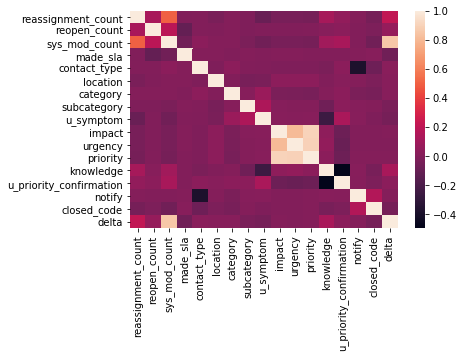

In [21]:
# Correlation matrix
corrMatrix = incidents_.corr()
sns.heatmap(corrMatrix)

In [22]:
# sns.heatmap(corrMatrix)

#### We can see that ```sys_mod_count``` is highly correlated with delta ( > 80% )

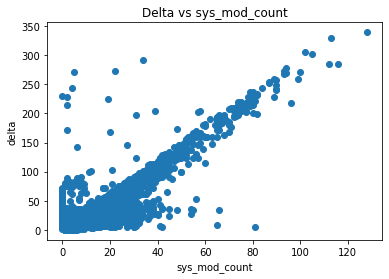

In [22]:
# Plot
fig, ax = plt.subplots()

ax.scatter(incidents_.sys_mod_count, incidents_.delta)
ax.set_title('Delta vs sys_mod_count')
plt.xlabel('sys_mod_count')
plt.ylabel('delta')
plt.show()

# Building models 

In [23]:
# Split dataset
X = incidents_.copy()
X.drop('delta', axis=1, inplace=True)
X.drop('sys_updated_at', axis=1, inplace=True)
y = incidents_.delta
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [24]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

In [25]:
# Linear Reg
linreg = LinearRegression()
linreg.fit(X_train, y_train)
scores = cross_val_score(linreg, X_test, y_test, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.794 +/- 0.093


In [26]:
# Linear Reg with scaled values
linreg_scaled = LinearRegression()
linreg_scaled.fit(X_train_s, y_train)
scores = cross_val_score(linreg_scaled, X_test, y_test, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.794 +/- 0.093


In [27]:
# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_s, y_train)
scores = cross_val_score(ridge, X_test, y_test, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.794 +/- 0.093


In [28]:
# Decision Tree
dtr = DecisionTreeRegressor(max_depth=2, random_state=0)
dtr.fit(X_train_s, y_train)
scores = cross_val_score(dtr, X_test, y_test, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.669 +/- 0.100


In [30]:
# Random Forest
rfr = RandomForestRegressor(max_depth=2, random_state=0)
rfr.fit(X_train_s, y_train)
scores = cross_val_score(rfr, X_test, y_test, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.728 +/- 0.099


In [31]:
# Ada Boost
adb = AdaBoostRegressor(random_state=0, n_estimators=100)
adb.fit(X_train_s, y_train)
scores = cross_val_score(adb, X_test, y_test, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.567 +/- 0.252


In [29]:
# Gradient Boosting
grb = GradientBoostingRegressor(n_estimators=500, max_depth=30, min_samples_split=2, 
                                learning_rate=0.01, loss='ls')
grb.fit(X_train, y_train)
scores = cross_val_score(grb, X_test, y_test, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.638 +/- 0.167


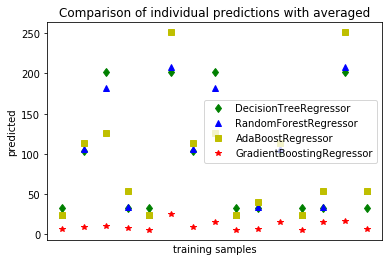

In [33]:
# Plot prediction on test samples
xt = X_test[:15]

plt.figure()
plt.plot(dtr.predict(xt), 'gd', label='DecisionTreeRegressor')
plt.plot(rfr.predict(xt), 'b^', label='RandomForestRegressor')
plt.plot(adb.predict(xt), 'ys', label='AdaBoostRegressor')
plt.plot(grb.predict(xt), 'r*', label='GradientBoostingRegressor')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with averaged')
plt.show()

In [34]:
# Plot deviance between training and testing sets
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

def deviance(estimator, X):
    test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

    for i, y_pred in enumerate(estimator.staged_predict(X)):
        test_score[i] = estimator.loss_(y_test, y_pred)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Deviance')
    plt.plot(np.arange(params['n_estimators']) + 1, estimator.train_score_, 'b-',
             label='Training Set Deviance')
    plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
             label='Test Set Deviance')
    plt.legend(loc='upper right')
    plt.xlabel('Boosting Iterations')
    plt.ylabel('Deviance')

    feature_importance = estimator.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, incidents_.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

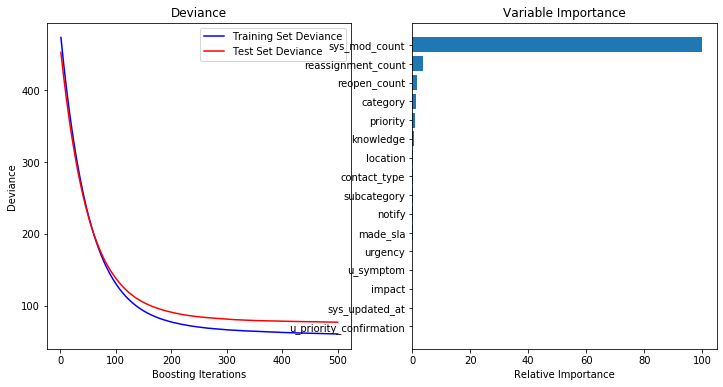

In [35]:
deviance(grb, X_test)

In [37]:
# Next we'll choose GradientBoostingRegressor because its showing better scores and,
# on the plot above, prediction with GBR is in the middle of others algorithms predictions.

# We run GridSearchCV to find most suitable hyperparameters

# After some test, max_depth, and min_samples_split does not change anything in scores.

# Least Squares Loss function is showing the best results

# GridSearchCV
e = [100, 500]
lr = [0.001, 0.1]
gridsearch = GridSearchCV(grb, {'n_estimators': e, 'learning_rate': lr})
gridsearch.fit(X, y)

best_params = gridsearch.best_params_
best_params

{'learning_rate': 0.1, 'n_estimators': 100}

In [ ]:
# Not increasing score

In [38]:
# Gradient Boosting { n_estimators: 500, max_depth: 4}
grb_test = GradientBoostingRegressor(n_estimators=best_params['n_estimators'], max_depth=4, min_samples_split=2, 
                                learning_rate=best_params['learning_rate'], loss='ls')
grb_test.fit(X_train_s, y_train)
scores = cross_val_score(grb, X_test, y_test, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.820 +/- 0.096


In [39]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

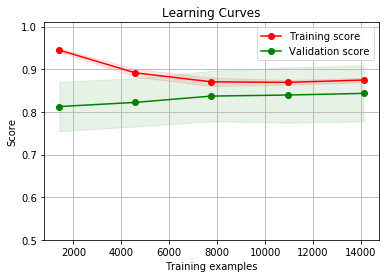

In [40]:
# Plot learning curves
title = "Learning Curves"
cv = 10
plot_learning_curve(grb, title, X_train_s, y_train, ylim=(0.5, 1.01), cv=cv, n_jobs=20);

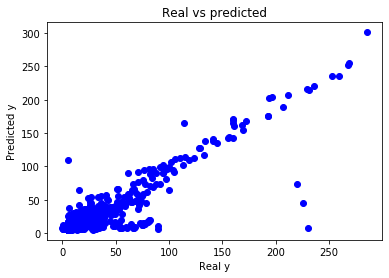

In [41]:
# Plot real vs predicted values

#pred_real = y_test
pred_real = pd.DataFrame({'y': y_test, 'y_pred': grb.predict(X_test) })

plt.figure()
plt.title('Real vs predicted')
plt.xlabel("Real y")
plt.ylabel("Predicted y")
plt.plot(pred_real.y, pred_real.y_pred, 'bo')

In [42]:
# Good prediction for training set. It's representing a linear function f(x) = x

In [43]:
# Install pickle
!pip install pickle

  ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [44]:
import pickle

# Export GradientBoostingRegressor model

with open("grb.pkl", "wb") as file:
        pickle.dump(grb, file)

## Conclusion

When ploting learning curves, both scores are going to be closer themselves. That means our model have 0.82% score and probably does not overfit due to learning curves.